<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Lecture/17_TFKeras_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM block 구현

> LSTM을 처음 제안한 논문에서 LSTM의 성능을 확인하기 위해 제시한 문제

- LSTM의 우수성을 증명하기 위해 만들어진 코드를 변형한 예제이다.

In [2]:
import numpy as np
import tensorflow as tf
import random

In [3]:
# data 생성

X = []; Y = [];

for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.14714186]
 [0.         0.38022443]
 [0.         0.01805587]
 [0.         0.22172956]
 [0.         0.84814379]
 [0.         0.3211143 ]
 [0.         0.42340285]
 [0.         0.36657159]
 [0.         0.33095419]
 [0.         0.83313492]
 [0.         0.85190388]
 [0.         0.76532404]
 [0.         0.15955834]
 [0.         0.04563664]
 [0.         0.39735761]
 [0.         0.14348405]
 [0.         0.49343214]
 [0.         0.87379176]
 [0.         0.65671601]
 [0.         0.96290643]
 [0.         0.74184509]
 [0.         0.92136354]
 [0.         0.07425477]
 [0.         0.10167141]
 [0.         0.84855195]
 [0.         0.53132969]
 [0.         0.85070985]
 [0.         0.2801533 ]
 [0.         0.60792164]
 [0.         0.91885348]
 [0.         0.46367638]
 [0.         0.70986663]
 [0.         0.05618485]
 [0.         0.50574049]
 [0.         0.67852662]
 [0.         0.67890477]
 [0.         0.87143338]
 [0.         0.77514193]
 [0.         0.04363263]
 [0.         0.42790217]


### - RNN

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 30)           990       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30)                1830      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 2851 (11.14 KB)
Trainable params: 2851 (11.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# 훈련

X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 6s 47ms/step - loss: 0.0615 - val_loss: 0.0504
Epoch 2/100
64/64 [==============================] - 2s 38ms/step - loss: 0.0533 - val_loss: 0.0483
Epoch 3/100
64/64 [==============================] - 2s 37ms/step - loss: 0.0540 - val_loss: 0.0503
Epoch 4/100
64/64 [==============================] - 4s 62ms/step - loss: 0.0524 - val_loss: 0.0514
Epoch 5/100
64/64 [==============================] - 4s 59ms/step - loss: 0.0527 - val_loss: 0.0487
Epoch 6/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0528 - val_loss: 0.0515
Epoch 7/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0523 - val_loss: 0.0484
Epoch 8/100
64/64 [==============================] - 4s 57ms/step - loss: 0.0522 - val_loss: 0.0495
Epoch 9/100
64/64 [==============================] - 4s 67ms/step - loss: 0.0523 - val_loss: 0.0498
Epoch 10/100
64/64 [==============================] - 2s 39ms/step - loss: 0.0522 - val_loss: 0.0540

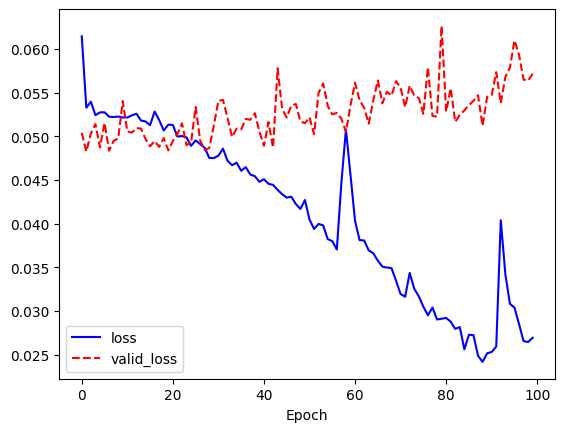

In [6]:
import matplotlib.pyplot as plt

# 결과 확인: 결과가 엉망이다.

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='valid_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### - LSTM

In [8]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 30)           3960      
                                                                 
 lstm_1 (LSTM)               (None, 30)                7320      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11311 (44.18 KB)
Trainable params: 11311 (44.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# 동일하게 학습

history = lstm_model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 8s 79ms/step - loss: 0.0552 - val_loss: 0.0486
Epoch 2/100
64/64 [==============================] - 5s 79ms/step - loss: 0.0532 - val_loss: 0.0494
Epoch 3/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0526 - val_loss: 0.0499
Epoch 4/100
64/64 [==============================] - 5s 82ms/step - loss: 0.0523 - val_loss: 0.0483
Epoch 5/100
64/64 [==============================] - 5s 79ms/step - loss: 0.0526 - val_loss: 0.0483
Epoch 6/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0524 - val_loss: 0.0486
Epoch 7/100
64/64 [==============================] - 4s 70ms/step - loss: 0.0523 - val_loss: 0.0487
Epoch 8/100
64/64 [==============================] - 5s 72ms/step - loss: 0.0523 - val_loss: 0.0481
Epoch 9/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0521 - val_loss: 0.0484
Epoch 10/100
64/64 [==============================] - 5s 73ms/step - loss: 0.0521 - val_loss: 0.0511

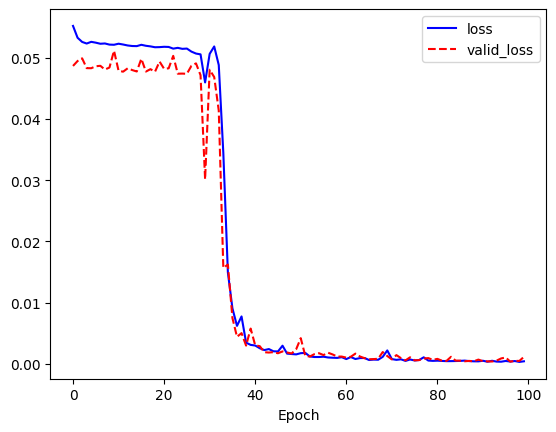

In [12]:
# 결과 확인 : 성능이 아주 좋다.

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='valid_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()